# K-Nearest Neighbors Algorithm:

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

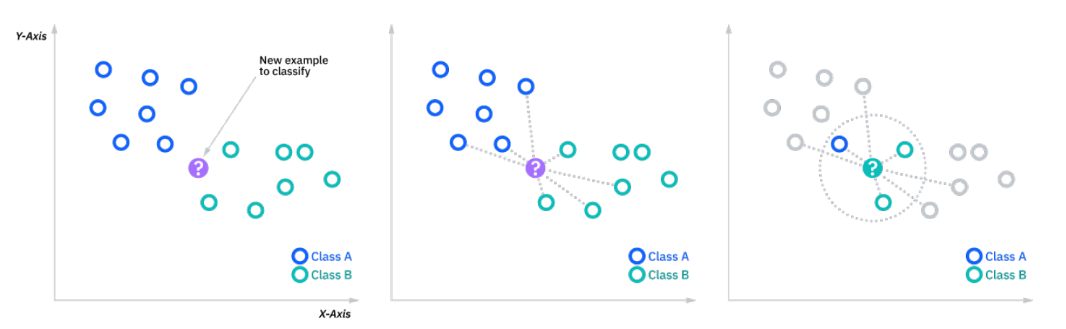

For classification problems, a class label is assigned on the basis of a majority vote—i.e. the label that is most frequently represented around a given data point is used. While this is technically considered “plurality voting”, the term, “majority vote” is more commonly used in literature. The distinction between these terminologies is that “majority voting” technically requires a majority of greater than 50%, which primarily works when there are only two categories. When you have multiple classes—e.g. four categories, you don’t necessarily need 50% of the vote to make a conclusion about a class; you could assign a class label with a vote of greater than 25%

## Working:


### Distance metrics:


While there are several distance measures that you can choose from, we will only cover the following:

### Euclidean distance:

This is the most commonly used distance measure, and it is limited to real-valued vectors. Using the below formula, it measures a straight line between the query point and the other point being measured.

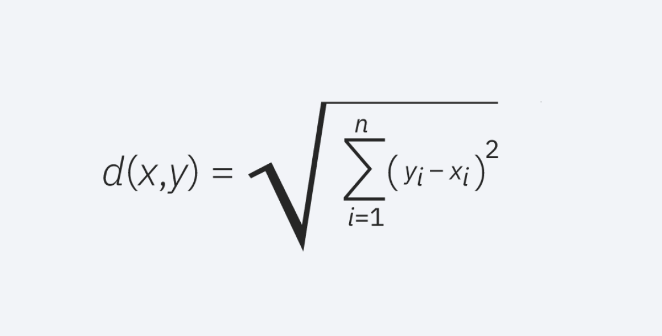

### Manhattan distance :

This is also another popular distance metric, which measures the absolute value between two points. It is also referred to as taxicab distance or city block distance as it is commonly visualized with a grid, illustrating how one might navigate from one address to another via city streets.


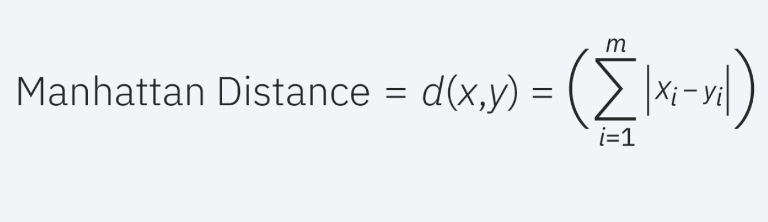

### Defining k:


The k value in the k-NN algorithm defines how many neighbors will be checked to determine the classification of a specific query point. For example, if k=1, the instance will be assigned to the same class as its single nearest neighbor. Defining k can be a balancing act as different values can lead to overfitting or underfitting. Lower values of k can have high variance, but low bias, and larger values of k may lead to high bias and lower variance. The choice of k will largely depend on the input data as data with more outliers or noise will likely perform better with higher values of k. Overall, it is recommended to have an odd number for k to avoid ties in classification, and cross-validation tactics can help you choose the optimal k for your dataset.

## Code: 

In [2]:
#import
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
#Reading Dataset

movies='dataset/movies.csv'
ratings='dataset/ratings.csv'

df_movies=pd.read_csv(movies, usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})
print(df_movies.head(10))



   movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)
5        6                         Heat (1995)
6        7                      Sabrina (1995)
7        8                 Tom and Huck (1995)
8        9                 Sudden Death (1995)
9       10                    GoldenEye (1995)


In [4]:
df_ratings=pd.read_csv(ratings, usecols=['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})
print(df_ratings.head(10))

   userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0
5       1       70     3.0
6       1      101     5.0
7       1      110     4.0
8       1      151     5.0
9       1      157     5.0


In [41]:
#Sparse Matrix

movies_users=df_ratings.pivot(index='movieId', columns='userId',values='rating').fillna(0)
mat_movies_users=csr_matrix(movies_users.values)
print(movies_users)

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
193581   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193583   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193585   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193587   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193609   0.0  0.0  0.0  0.0 

In [47]:
# Applying KNN with Cosine Similarity
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)

In [48]:
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [55]:
def recommender(movie_name, data,model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(movie_name, df_movies['title'])[2]
    print('Movie Selected: ',df_movies['title'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(df_movies['title'][i].where(i!=idx))
    
recommender('Iron Man', mat_movies_users, model_knn,5)

Movie Selected:  Iron Man (2008) Index:  6743
Searching for recommendations.....
6743                        NaN
7197              Garage (2007)
7195    Merry Madagascar (2009)
7354         A-Team, The (2010)
6726     Superhero Movie (2008)
Name: title, dtype: object
